# Extract frames from videos

In [2]:
# coding=utf-8
# 使用OpenCV视频中提取帧图片并保存(cv2.VideoCapture)
import os
import cv2
import shutil
import time

# 全局变量
VIDEO_PATH = 'assets/20230101_000613_vflip.MP4'  # 视频地址
EXTRACT_FOLDER = 'assets'  # 存放帧图片的位置
EXTRACT_FREQUENCY = 10  # 帧提取频率


# 主操作
def extract_frames(video_path, dst_folder, index):
    # 实例化视频对象
    video = cv2.VideoCapture(video_path)
    frame_count = 0

    # 循环遍历视频中的所有帧
    while True:
        # 逐帧读取
        _, frame = video.read()
        if frame is None:
            break
        # 按照设置的频率保存图片
        if frame_count % EXTRACT_FREQUENCY == 0:
            # 设置保存文件名
            save_path = "{}/{:>03d}.jpg".format(dst_folder, index)
            # 保存图片
            cv2.imwrite(save_path, frame)
            index += 1  # 保存图片数＋1
        frame_count += 1  # 读取视频帧数＋1

    # 视频总帧数
    print(f'the number of frames: {frame_count}')
    # 打印出所提取图片的总数
    print(f"Totally save {(index - 1):d} imgs")

    # 计算FPS 方法一 get()
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')  # Find OpenCV version
    # (major_ver, minor_ver, subminor_ver) = (4, 5, 4)
    if int(major_ver) < 3:
        fps = video.get(cv2.cv.CV_CAP_PROP_FPS)  # 获取当前版本opencv的FPS
        print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
    else:
        fps = video.get(cv2.CAP_PROP_FPS)  # 获取当前版本opencv的FPS
        print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

    # 最后释放掉实例化的视频
    video.release()


def main():
    # 递归删除之前存放帧图片的文件夹，并新建一个
    try:
        shutil.rmtree(EXTRACT_FOLDER)
    except OSError:
        pass

    current_time = time.localtime()
    save_folder = os.path.join(
        EXTRACT_FOLDER, time.strftime("%Y_%m_%d_%H_%M_%S", current_time)
    )
    os.makedirs(save_folder, exist_ok=True)
    # 抽取帧图片，并保存到指定路径
    extract_frames(VIDEO_PATH, save_folder, 1)


if __name__ == '__main__':
    main()

the number of frames: 1824
Totally save 183 imgs
Frames per second using video.get(cv2.CAP_PROP_FPS) : 29.97002997002997


# Crop Slices

In [14]:
import cv2

img = cv2.imread("assets/test_frames/001.jpg")

# # 防止键盘事件导致中断
# while True:

#     cv2.imshow('img', img)

#     key = cv2.waitKey(0)

#     if(key & 0xFF == ord('q')):
#         break
#     elif(key & 0xFF == ord('s')):
#         cv2.imwrite("outputs_imgs/outputs_slices/save.jpg", img)
#     else:
#         print(key)

# cv2.destroyAllWindows()

height = img.shape[0]
width = img.shape[1]
print("Image height is ", height, " and width is ", width)
stride = 64
slice_size = (320, 320)
print("Crop height is ", slice_size[0], " and width is ", slice_size[1])

count = 1
for y in range(0, height, stride):
    for x in range(0, width, stride):
        box = (x, y, x + slice_size[0], y + slice_size[1])
        slice_img = img[y:y + slice_size[1], x:x + slice_size[0]]
        
        crop_height_actual, crop_width_actual = slice_img.shape[:2]
        if crop_height_actual < slice_size[0] or crop_width_actual < slice_size[1]:
            continue

        # 保存裁剪后的图像
        cv2.imwrite('outputs_imgs/outputs_slices/cropped_image_{}.jpg'.format(count), slice_img)
        print("裁剪后的图像 {}.jpg 已保存。".format(count))
        count += 1
        # cropped_image = img[64:320+64, 64:320+64]
        # cv2.imwrite('outputs_imgs/outputs_slices/cropped_image_1.jpg', cropped_image)
        # print("Slice img width is ", slice_img.shape[0], " and height is ", slice_img.shape[1])
        # if slice_img.shape[0] == 320 and slice_img.shape[1] == 320:
        #     cv2.imwrite("outputs_imgs/outputs_slices", slice_img)
#             cv2.namedWindow("Cropped images", cv2.WINDOW_NORMAL)
#             cv2.resizeWindow("Cropped images", 800, 600)
#             cv2.imshow("Cropped image ", slice_img)
#             cv2.waitKey(10)
# cv2.destroyAllWindows()

Image height is  2160  and width is  3840
Crop height is  320  and width is  320
裁剪后的图像 1.jpg 已保存。
裁剪后的图像 2.jpg 已保存。
裁剪后的图像 3.jpg 已保存。
裁剪后的图像 4.jpg 已保存。
裁剪后的图像 5.jpg 已保存。
裁剪后的图像 6.jpg 已保存。
裁剪后的图像 7.jpg 已保存。
裁剪后的图像 8.jpg 已保存。
裁剪后的图像 9.jpg 已保存。
裁剪后的图像 10.jpg 已保存。
裁剪后的图像 11.jpg 已保存。
裁剪后的图像 12.jpg 已保存。
裁剪后的图像 13.jpg 已保存。
裁剪后的图像 14.jpg 已保存。
裁剪后的图像 15.jpg 已保存。
裁剪后的图像 16.jpg 已保存。
裁剪后的图像 17.jpg 已保存。
裁剪后的图像 18.jpg 已保存。
裁剪后的图像 19.jpg 已保存。
裁剪后的图像 20.jpg 已保存。
裁剪后的图像 21.jpg 已保存。
裁剪后的图像 22.jpg 已保存。
裁剪后的图像 23.jpg 已保存。
裁剪后的图像 24.jpg 已保存。
裁剪后的图像 25.jpg 已保存。
裁剪后的图像 26.jpg 已保存。
裁剪后的图像 27.jpg 已保存。
裁剪后的图像 28.jpg 已保存。
裁剪后的图像 29.jpg 已保存。
裁剪后的图像 30.jpg 已保存。
裁剪后的图像 31.jpg 已保存。
裁剪后的图像 32.jpg 已保存。
裁剪后的图像 33.jpg 已保存。
裁剪后的图像 34.jpg 已保存。
裁剪后的图像 35.jpg 已保存。
裁剪后的图像 36.jpg 已保存。
裁剪后的图像 37.jpg 已保存。
裁剪后的图像 38.jpg 已保存。
裁剪后的图像 39.jpg 已保存。
裁剪后的图像 40.jpg 已保存。
裁剪后的图像 41.jpg 已保存。
裁剪后的图像 42.jpg 已保存。
裁剪后的图像 43.jpg 已保存。
裁剪后的图像 44.jpg 已保存。
裁剪后的图像 45.jpg 已保存。
裁剪后的图像 46.jpg 已保存。
裁剪后的图像 47.jpg 已保存。
裁剪后的图像 48.jpg 已保存。
裁剪后的图像 49.jpg 已保

In [11]:
import cv2

# 加载图像
image = cv2.imread('assets/test_frames/001.jpg')

# 定义裁剪尺寸
crop_width, crop_height = 320, 320

# 定义裁剪步长
step_x, step_y = 64, 64

# 获取图像尺寸
image_height, image_width = image.shape[:2]

# 循环裁剪并保存
count = 1
for y in range(0, image_height, step_y):
    for x in range(0, image_width, step_x):
        # 裁剪图像
        crop = image[y:y+crop_height, x:x+crop_width]

        # 确保裁剪区域不超出图像边界
        crop_height_actual, crop_width_actual = crop.shape[:2]
        if crop_height_actual < crop_height or crop_width_actual < crop_width:
            continue

        # 保存裁剪后的图像
        cv2.imwrite('outputs_imgs/outputs_slices/cropped_image_{}.jpg'.format(count), crop)
        print("裁剪后的图像 {}.jpg 已保存。".format(count))

        count += 1


裁剪后的图像 1.jpg 已保存。
裁剪后的图像 2.jpg 已保存。
裁剪后的图像 3.jpg 已保存。
裁剪后的图像 4.jpg 已保存。
裁剪后的图像 5.jpg 已保存。
裁剪后的图像 6.jpg 已保存。
裁剪后的图像 7.jpg 已保存。
裁剪后的图像 8.jpg 已保存。
裁剪后的图像 9.jpg 已保存。
裁剪后的图像 10.jpg 已保存。
裁剪后的图像 11.jpg 已保存。
裁剪后的图像 12.jpg 已保存。
裁剪后的图像 13.jpg 已保存。
裁剪后的图像 14.jpg 已保存。
裁剪后的图像 15.jpg 已保存。
裁剪后的图像 16.jpg 已保存。
裁剪后的图像 17.jpg 已保存。
裁剪后的图像 18.jpg 已保存。
裁剪后的图像 19.jpg 已保存。
裁剪后的图像 20.jpg 已保存。
裁剪后的图像 21.jpg 已保存。
裁剪后的图像 22.jpg 已保存。
裁剪后的图像 23.jpg 已保存。
裁剪后的图像 24.jpg 已保存。
裁剪后的图像 25.jpg 已保存。
裁剪后的图像 26.jpg 已保存。
裁剪后的图像 27.jpg 已保存。
裁剪后的图像 28.jpg 已保存。
裁剪后的图像 29.jpg 已保存。
裁剪后的图像 30.jpg 已保存。
裁剪后的图像 31.jpg 已保存。
裁剪后的图像 32.jpg 已保存。
裁剪后的图像 33.jpg 已保存。
裁剪后的图像 34.jpg 已保存。
裁剪后的图像 35.jpg 已保存。
裁剪后的图像 36.jpg 已保存。
裁剪后的图像 37.jpg 已保存。
裁剪后的图像 38.jpg 已保存。
裁剪后的图像 39.jpg 已保存。
裁剪后的图像 40.jpg 已保存。
裁剪后的图像 41.jpg 已保存。
裁剪后的图像 42.jpg 已保存。
裁剪后的图像 43.jpg 已保存。
裁剪后的图像 44.jpg 已保存。
裁剪后的图像 45.jpg 已保存。
裁剪后的图像 46.jpg 已保存。
裁剪后的图像 47.jpg 已保存。
裁剪后的图像 48.jpg 已保存。
裁剪后的图像 49.jpg 已保存。
裁剪后的图像 50.jpg 已保存。
裁剪后的图像 51.jpg 已保存。
裁剪后的图像 52.jpg 已保存。
裁剪后的图像 53.jpg 已保存。
裁剪

# 对不同地址的同一张图像测试

In [1]:
import cv2

frame = cv2.imread('assets/001.jpg')

height, width = frame.shape[:2]

frame_1 = frame[height-320:height, width-320:width]
cv2.namedWindow("test", cv2.WINDOW_NORMAL);
cv2.resizeWindow('window',800,600)#更改窗口的大小

cv2.imshow('test', frame_1)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 测试NMS

[12321. 29241. 11211.  9191.  8736. 10656.]


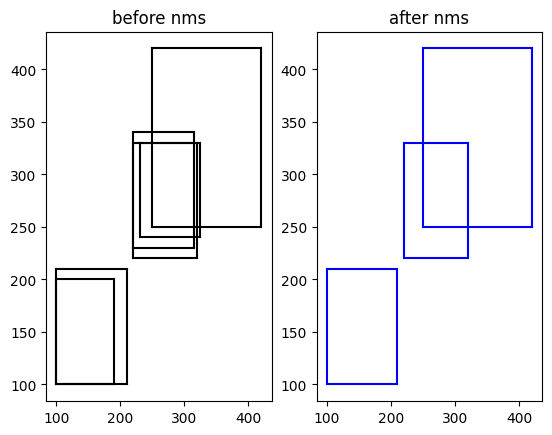

In [1]:
import numpy as np
import matplotlib.pyplot as plt

boxes=np.array([[100,100,210,210,0.72],
        [250,250,420,420,0.8],
        [220,220,320,330,0.92],
        [100,100,190,200,0.71],
        [230,240,325,330,0.81],
        [220,230,315,340,0.9]]) 
 
 
def py_cpu_nms(dets, thresh):
    "Pure Python NMS baseline"
    # x1、y1、x2、y2以及score赋值
    x1 = dets[:,0]
    y1 = dets[:,1]
    x2 = dets[:,2]
    y2 = dets[:,3]
    scores = dets[:, 4]

    # 每一个检测框的面积
    areas = (y2-y1+1) * (x2-x1+1)
    print(areas)
    # 按照score置信度降序排序
    order = scores.argsort()[::-1]

    keep = [] # 保留的结果框集合
    while order.size >0:
        i = order[0]       # every time the first is the biggst, and add it directly
        keep.append(i) # 保留该类剩余box中得分最高的一个
        # 得到相交区域,左上及右下
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        # 计算相交的面积,不重叠时面积为0
        w = np.maximum(0, xx2-xx1+1)    # the weights of overlap
        h = np.maximum(0, yy2-yy1+1)    # the height of overlap
        inter = w*h
        # 计算IoU：重叠面积 /（面积1+面积2-重叠面积）
        ovr = inter / (areas[i]+areas[order[1:]] - inter)
        # 保留IoU小于阈值的box
        indx = np.where(ovr<=thresh)[0]
        order = order[indx+1]   # 因为ovr数组的长度比order数组少一个,所以这里要将所有下标后移一位

    return keep
        
 

def plot_bbox(dets, c='k'):
    x1 = dets[:,0]
    y1 = dets[:,1]
    x2 = dets[:,2]
    y2 = dets[:,3]
    
    plt.plot([x1,x2], [y1,y1], c)
    plt.plot([x1,x1], [y1,y2], c)
    plt.plot([x1,x2], [y2,y2], c)
    plt.plot([x2,x2], [y1,y2], c)
    #plt.title(" nms")
    #plt.show()

plt.figure(1)
ax1 = plt.subplot(1,2,1)
ax1.set_title('before nms')
ax2 = plt.subplot(1,2,2)
ax2.set_title('after nms')
 
plt.sca(ax1)
plot_bbox(boxes,'k')   # before nms

keep = py_cpu_nms(boxes, thresh=0.7)
plt.sca(ax2)
plot_bbox(boxes[keep], 'b')# after nms
plt.show()
